# Passing Networks

In [169]:
%matplotlib inline

In [170]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen
import pandas as pd

In [171]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(3879791)

Check for index of first sub

In [172]:
substitution = df.loc[df["type_name"] == "Substitution"].loc[df["team_name"] == "AC Milan"].iloc[0]["index"]

Dataframe with successfull passes by Milan until the first substitution

In [173]:
mask_milan = (df.type_name == 'Pass') & (df.team_name == "AC Milan") & (df.index < substitution) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in")

df_pass = df.loc[mask_milan, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]

Adjusting that only the surname of a player is presented.

In [174]:
df_pass

,x,y,end_x,end_y,player_name,pass_recipient_name
11,29.5,25.1,43.3,23.4,Alessio Romagnoli,Andrea Bertolacci
14,42.8,23.2,50.0,25.9,Andrea Bertolacci,Giacomo Bonaventura
99,89.9,58.1,111.6,75.6,Riccardo Montolivo,Keisuke Honda
118,66.3,42.2,28.2,59.5,Luca Antonelli,Alessio Romagnoli
121,25.6,58.1,38.7,71.0,Alessio Romagnoli,Cristian Eduardo Zapata Valencia
...,...,...,...,...,...,...
2476,26.7,25.1,41.6,64.2,Riccardo Montolivo,Luiz Adriano de Souza da Silva
2487,63.1,66.6,76.7,59.3,Riccardo Montolivo,Keisuke Honda
2490,76.9,56.6,100.2,40.5,Keisuke Honda,Carlos Arturo Bacca Ahumada
2538,48.2,11.4,53.2,35.7,Andrea Bertolacci,Cristian Eduardo Zapata Valencia


In [175]:
df_pass["player_name"] = df_pass["player_name"].apply(lambda x: str(x).split()[-1] if len(str(x).split()) == 2 else str(x).split()[2]) 
df_pass["pass_recipient_name"] = df_pass["pass_recipient_name"].apply(lambda x: str(x).split()[-1] if len(str(x).split()) == 2 else str(x).split()[2])


Per ogni giocatore si calcola la posizione media dei passaggi effettuati e delle ricezioni.

In [176]:
df_pass

,x,y,end_x,end_y,player_name,pass_recipient_name
11,29.5,25.1,43.3,23.4,Romagnoli,Bertolacci
14,42.8,23.2,50.0,25.9,Bertolacci,Bonaventura
99,89.9,58.1,111.6,75.6,Montolivo,Honda
118,66.3,42.2,28.2,59.5,Antonelli,Romagnoli
121,25.6,58.1,38.7,71.0,Romagnoli,Zapata
...,...,...,...,...,...,...
2476,26.7,25.1,41.6,64.2,Montolivo,de
2487,63.1,66.6,76.7,59.3,Montolivo,Honda
2490,76.9,56.6,100.2,40.5,Honda,Bacca
2538,48.2,11.4,53.2,35.7,Bertolacci,Zapata


In [177]:
df_pass = df_pass.replace('de', 'Luiz Adriano')

In [178]:
df_pass

,x,y,end_x,end_y,player_name,pass_recipient_name
11,29.5,25.1,43.3,23.4,Romagnoli,Bertolacci
14,42.8,23.2,50.0,25.9,Bertolacci,Bonaventura
99,89.9,58.1,111.6,75.6,Montolivo,Honda
118,66.3,42.2,28.2,59.5,Antonelli,Romagnoli
121,25.6,58.1,38.7,71.0,Romagnoli,Zapata
...,...,...,...,...,...,...
2476,26.7,25.1,41.6,64.2,Montolivo,Luiz Adriano
2487,63.1,66.6,76.7,59.3,Montolivo,Honda
2490,76.9,56.6,100.2,40.5,Honda,Bacca
2538,48.2,11.4,53.2,35.7,Bertolacci,Zapata


In [179]:
scatter_df = pd.DataFrame()
for i, name in enumerate(df_pass["player_name"].unique()):
    passx = df_pass.loc[df_pass["player_name"] == name]["x"].to_numpy()
    recx = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
    passy = df_pass.loc[df_pass["player_name"] == name]["y"].to_numpy()
    recy = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_y"].to_numpy()
    scatter_df.at[i, "player_name"] = name
    
    #Assicurarsi che la posizione x e y di ogni cerchio che rappresenta il giocatore sia la media dei passaggi e delle ricezioni.
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
    
    #calcolo numero dei passaggi
    scatter_df.at[i, "no"] = df_pass.loc[df_pass["player_name"] == name].count().iloc[0]

#regolare la dimensione di un cerchio in modo che il giocatore che ha effettuato più passaggi ha un cerchio più grande
scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1500)

In [180]:
scatter_df

,player_name,x,y,no,marker_size
0,Romagnoli,45.181013,27.420253,43.0,1500.000000
1,Bertolacci,61.639024,27.119512,21.0,732.558140
2,Montolivo,59.837500,42.095833,42.0,1465.116279
3,Antonelli,65.583871,12.390323,16.0,558.139535
4,Zapata,44.390769,56.078462,34.0,1186.046512
5,Abate,66.930357,70.221429,25.0,872.093023
6,Donnarumma,11.910345,39.762069,19.0,662.790698
7,Bonaventura,72.015909,21.109091,20.0,697.674419
8,Honda,78.513208,59.645283,23.0,802.325581
9,Luiz Adriano,83.062963,44.381481,10.0,348.837209


## Calcolo della larghezza delle linee

Più spessa è la linea, più passaggi sono stati effettuati dai due giocatori collegati.

In [181]:
#conteggio dei passaggi tra i giocatori
df_pass["pair_key"] = df_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
lines_df = df_pass.groupby(["pair_key"]).x.count().reset_index()
lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)

#impostazione di una soglia
lines_df = lines_df[lines_df['pass_count']>2]

## Plotting vertices

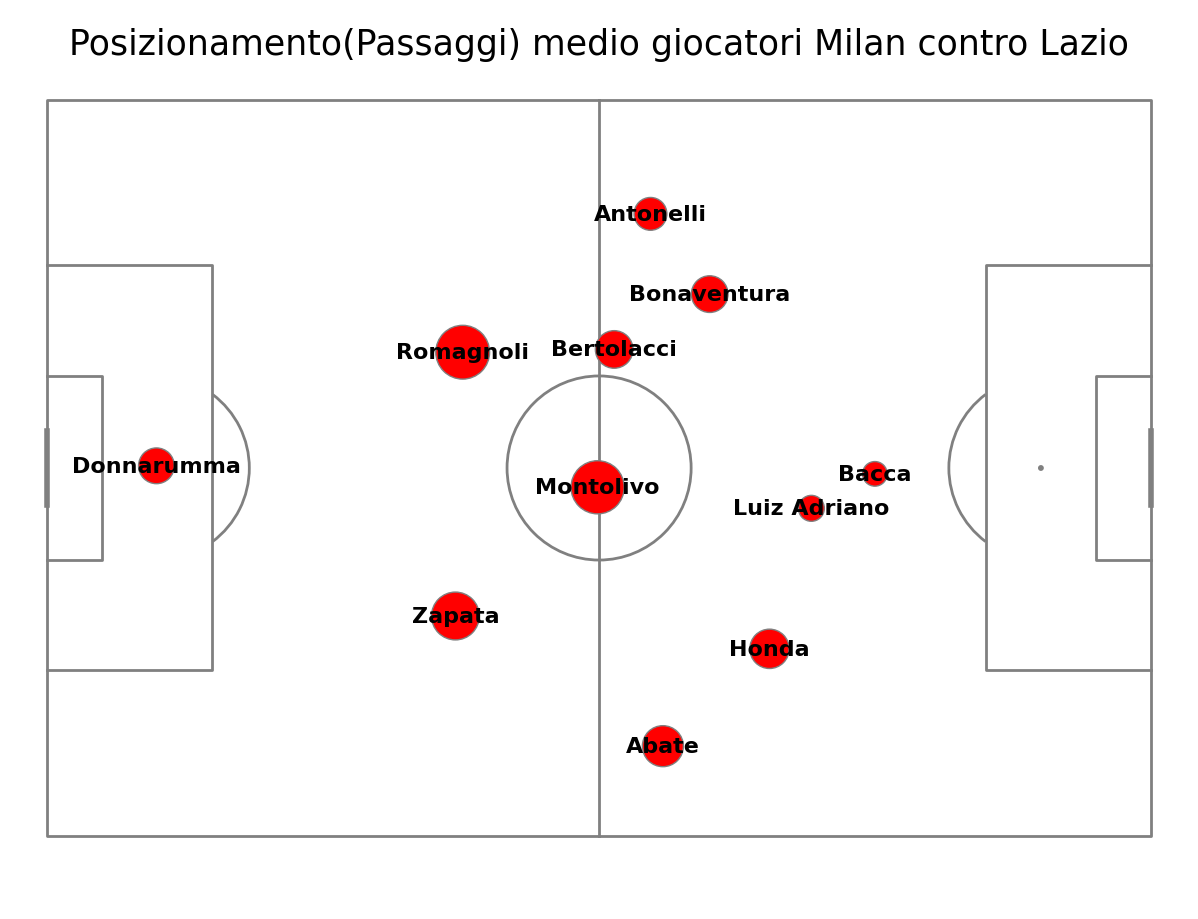

In [182]:
pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=.9, title_height=.06, axis=False, endnote_height=.04, title_space=0, endnote_space=0)

pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax['pitch'], zorder=3)

for i,row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight='bold', size=16, ax=ax['pitch'], zorder=4)
    
fig.suptitle('Posizionamento(Passaggi) medio giocatori Milan contro Lazio', fontsize= 25)
plt.show()

## Effettuare i collegamenti dei giocatori tramite linee che rappresentano i passaggi

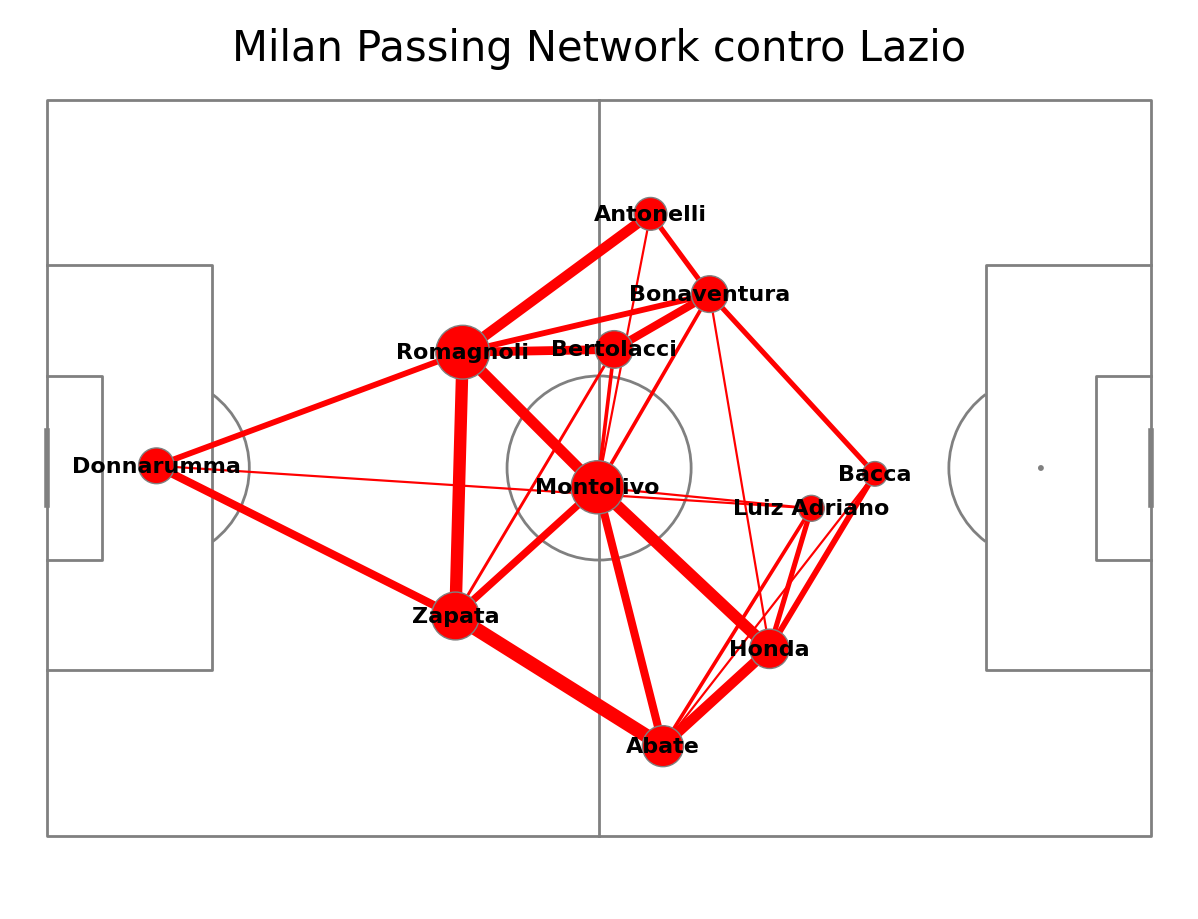

In [183]:
pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False, endnote_height=0.04, title_space=0, endnote_space=0)
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

for i, row in lines_df.iterrows():
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]
        #prendere la posizione media dei giocatori per tracciare una linea tra di loro
        player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
        player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
        num_passes = row["pass_count"]
        #regolare l'ampiezza della linea in modo che più passano, più la linea si allarga.
        line_width = (num_passes / lines_df['pass_count'].max() * 10)
        
        pitch.lines(player1_x, player1_y, player2_x, player2_y, alpha=1, lw=line_width, zorder=2, color="red", ax = ax["pitch"])

fig.suptitle("Milan Passing Network contro Lazio", fontsize = 30)
plt.show()

# Centralizzazione

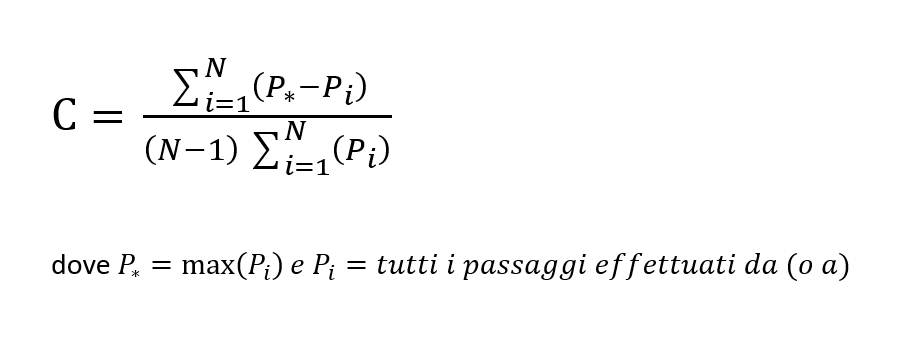

Questa formula calcola quanto centralizzata o decentralizzata sia una Squadra.
Più omogenei sono i passaggi tra i giocatori, più decentralizzata sarà la squadra. Viceversa più i passaggi sono rivolti principalmente verso uno o due giocatori specifici, più centralizzata sarà la squadra. Ciò significa che più centralizzata sarà la squadra, più il valore del calcolo si avvicina ad 1. Mentre si avvicina allo 0 se la squadra sarà decentralizzata.

In [186]:
#calculate number of successful passes by player
n_passes = df_pass.groupby(['player_name']).x.count().reset_index()
n_passes.rename({'x':'pass_count'}, axis='columns', inplace=True)
#find one who made most passes
max_n = n_passes["pass_count"].max()
#calculate the denominator - 10*the total sum of passes
denominator = 10*n_passes["pass_count"].sum()
#calculate the nominator
nominator = (max_n - n_passes["pass_count"]).sum()
#calculate the centralisation index
centralisation_index = nominator/denominator
print("Centralisation index is ", centralisation_index)

Centralisation index is  0.08053435114503817
